Usando el conjunto de datos de Fisher, implementar en python en colab los métodos descritos 1 Naive Bayes, 2 Decision Trees

Evaluar los dos usando las métricas de MCC y F1 y accuracy y compararlos.

**Empezamos con el método de Decision Tree**

In [ ]:
# Librerias a utilizar
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree

In [ ]:
# Se cargan los datos 
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [ ]:
# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X=iris.data 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Se crea Crea el objeto clasificador de árbol de decisión
clf = DecisionTreeClassifier()

In [ ]:
# Clasificador del árbol de decisión 
clf = clf.fit(X_train,y_train)

In [ ]:
# Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

[Ellipsis]

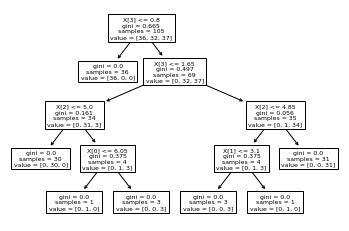

In [ ]:
tree.plot_tree(clf)
[...]

In [ ]:
#Evaluar el modelo
#Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [ ]:
#MCC
from sklearn.metrics import matthews_corrcoef
print("MCC:", metrics.matthews_corrcoef(y_test, y_pred))

MCC: 0.9326347305389222


In [ ]:
#F1
from sklearn.metrics import f1_score
print("F1 Score:", metrics.f1_score(y_test, y_pred,average='macro'))


F1 Score: 0.9558404558404558


In [ ]:
# Exportar el arbol en formato Graphviz para  colorear los nodos por su clase 
#y usar variables explícitas y nombres de clases
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

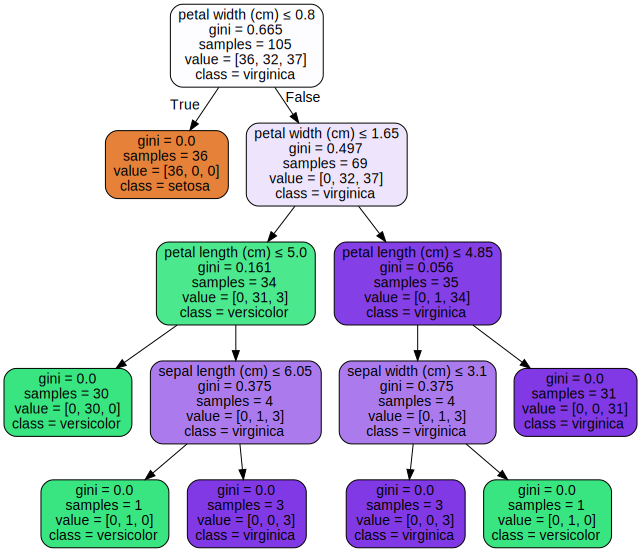

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Ahora vamos con Naive Bayes**

In [ ]:
# Librerias a utilizar
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Se cargan los datos 
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
# Se divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
gnb = GaussianNB()

In [ ]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print("Número de puntos mal etiquetados de un total de %d puntos : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Número de puntos mal etiquetados de un total de 75 puntos : 4


In [ ]:
#Evaluar el modelo
#Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9466666666666667


In [ ]:
#MCC
from sklearn.metrics import matthews_corrcoef
print("MCC:", metrics.matthews_corrcoef(y_test, y_pred))

MCC: 0.9226284715285437


In [ ]:
#F1
from sklearn.metrics import f1_score
print("F1 Score:", metrics.f1_score(y_test, y_pred,average='macro'))

F1 Score: 0.9488636363636364
